In [24]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 10
smoking_df = pd.read_csv("smoking.csv")
from pandasql import sqldf

In [26]:
def smoke_to_num(x):
    if x == "Yes":
        return 1
    else:
        return 0
smoking_df = smoking_df[["gender", "age", "marital_status", "highest_qualification", "nationality", "ethnicity", "gross_income", "region", "smoke"]]
smoking_df["smoke"] = smoking_df["smoke"].apply(smoke_to_num)

## Introduction
We have worked hard as a society to abolish smoking as a socially accepted tool. That being said, there are many that still struggle with a smoking addiction that is creating lasting affects on their health, potentially drastically shortening their lifespan. Our surroundings often play a large role in determining the type of lifestyle that we chose to live. Having a partner, for example, might pursuade us to become the best versions of ourselves. Another aspect that can have a real impact on our health choices is gender. If a man smokes, he may be seen as simply letting off steam, whereas if a woman smokes she may be more heavily looked down upon. For better or for worse, opinions change the way that we act just as much as our relationship status. But which plays a greater role, and which demographic of people are must at risk of impacting their health from smoking?

In this report, I statistically show which broad group of people is most likley to have the largest amount of smokers and explain what this might mean for how we can better limit smoking for all in the future. 

## Background
This data was put together by Stats4Schools and was collected from <a href = "https://www.stem.org.uk/resources/elibrary/resource/28452/large-datasets-stats4schools">stem.org.uk</a>. The dataset includes many variables that potentially play a role in determining the probability that someone smokes tobacco. The variables used in this investigation include:

<ul>
    <li><b>marital_status:</b> Marital Status (Divorced, Married, Single, etc.)</li>
    <li><b>gender:</b> (Male, Female)</li>
    <li><b>age</b></li>
    <li><b>highest_qualification:</b> Highest Level of Education</li>
    <li><b>ethnicity:</b> (Asian, Black, Chinese, Mixed, White, Refused and Unknown)</li>
    <li><b>gross_income: </b>(Under 2,600, 2,600 to 5,200, 5,200 to 10,400, 10,400 to 15,600, 15,600 to 20,800, 20,800 to 28,600, 28,600 to 36,400, Above 36,400, Refused and Unknown)</li>
    <li><b>smoke: </b> Whether or not the person smokes (Yes, No)</li>
</ul>

The `smoke` column will be modified to contain ones and zeros. (1 = Yes, 0 = No)

# Inference on Difference of Proportion of Smokers

## **Part 1:** Married vs. Single

For the sake of simplicity, and drawing real conclusions, we will just focus on the single and the married people in the `marital_status` column. At least from our sample, these two groups have the greatest difference in proportions from this column. To draw a conclusion about the respective percentages from the population, we can conduct a hypothesis test as well as a confidence interval.

The graph below shows the number of smokers and non-smokers we have in our dataset from the `Single` and `Married` catagories. The total number of smokers in both is very similar but the percentage of the total number is much different. 

Text(0.5, 1.0, 'Percentage of Sample that Smokes by Marital Status')

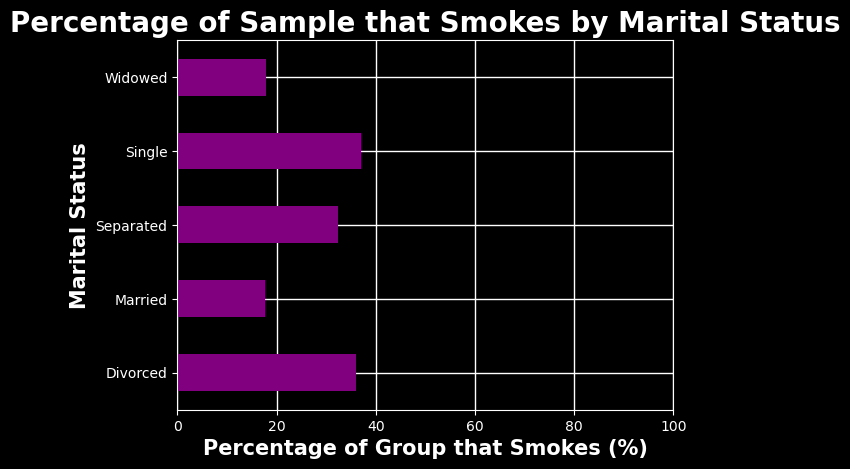

In [93]:
graph_1_df = sqldf("select marital_status, count(*) as total, sum(smoke) as total_smoke from smoking_df group by marital_status", locals())
plt.style.use("dark_background")
graph_1_df = graph_1_df.set_index("marital_status")
graph_1_df["Percentage of Group that Smokes"] = (graph_1_df["total_smoke"] / graph_1_df["total"]) * 100

ax = (graph_1_df["Percentage of Group that Smokes"]).plot.barh(color = "purple")
ax.set_xlabel("Percentage of Group that Smokes (%)", fontdict = {"fontweight": "bold", "fontsize" : 15})
ax.set_ylabel("Marital Status", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.set_xbound([0, 100])
ax.set_title("Percentage of Sample that Smokes by Marital Status", fontdict = {"fontsize" : 20, "fontweight": "bold"})

,total,total_smoke,non_smoke,perc_smoke
marital_status,,,,
Married,812,143,669,17.610837
Single,427,158,269,37.002342


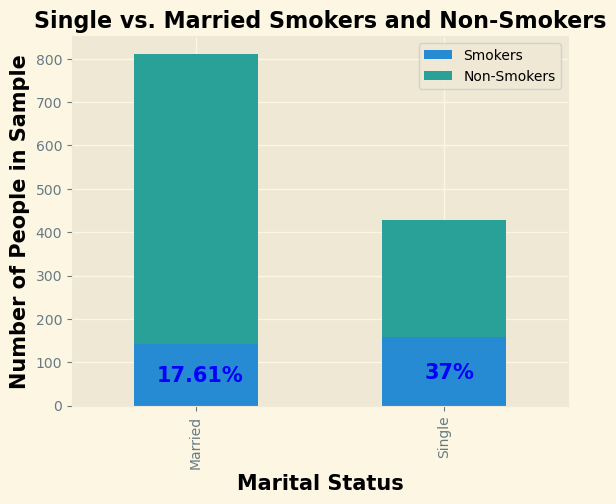

In [33]:
graph_2_df = sqldf("select marital_status, count(*) as total, sum(smoke) as total_smoke, (count(*) - sum(smoke)) as non_smoke from smoking_df where marital_status = 'Single' OR marital_status = 'Married' group by marital_status")
graph_2_df = graph_2_df.set_index("marital_status")
plt.style.use("Solarize_Light2")

ax = graph_2_df.plot.bar(y = ["total_smoke", "non_smoke"], stacked = True)
ax.text(s = "17.61%", y = 55, x = -0.16, color = "blue", size = 15, fontdict = {"fontweight" : "bold"})
ax.text(s = "37%", y = 63, x = 0.92, color = "blue", size = 15, fontdict = {"fontweight" : "bold"})
ax.set_title("Single vs. Married Smokers and Non-Smokers", color = "black", fontdict = {"fontweight" : "bold"})
ax.set_xlabel("Marital Status", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.set_ylabel("Number of People in Sample", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.legend(["Smokers", "Non-Smokers"], loc="upper right", labelcolor = "black")

graph_3_df = graph_2_df
graph_3_df["perc_smoke"] = 100 * graph_3_df["total_smoke"] / graph_3_df["total"]

graph_3_df

<div style="max-width: 800px; margin: 0 auto; font-family: Arial, sans-serif; line-height: 1.6;">

  <h2 style="color: #4CAF50; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">Hypothesis Testing</h2>
  
  <p style="font-size: 18px; font-weight: bold; margin-top: 10px;">
    Using a significance level of \( \alpha = 0.05 \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 1: Model Statement</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{Single} \sim \text{Binomial}(158, p_\text{Single}) \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{Married} \sim \text{Binomial}(143, p_\text{Married}) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 2: State Hypotheses</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_0: p_\text{Single} = p_\text{Married} \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_\alpha: p_\text{Single} \neq p_\text{Married} \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 3: Test Statistic and Null Distribution</h3>
  <p style="text-align: center; font-size: 18px;">
    <b>Test Statistic and Null Distribution for Difference of Proportions:</b>
  </p>
  <p style="text-align: center; font-size: 22px; color: #555;">
    \( Z = \frac{(\hat{p_1} - \hat{p_2}) - (0)}{\sqrt{\frac{\bar{p}(1-\bar{p})}{n_1} + \frac{\bar{p}(1-\bar{p})}{n_2}}} \sim N(0, 1) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 4: Identify Relevant Outcomes</h3>
  <p style="text-align: center; font-size: 20px;">
    \(\text{Single vs. Married Test Statistic} = 7.564\)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 5: Calculate a P-Value</h3>
  <p style="text-align: center; font-size: 18px; color: #555;">
    \( \text{P-Value} = 2 \cdot P(Z > |z|) \)
  </p>
  <p style="text-align: center; font-size: 20px; font-weight: bold;">
    \( \text{Single vs. Married P-Value} = 3.909 \times 10^{-14} \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 6: Interpret in Context</h3>
  <p style="font-size: 18px;">
    Our calculated P-Value is much smaller than our significance level of \( 0.05 \), providing significant evidence that the true proportion of single people who smoke in the UK is not equal to the proportion of married people who smoke. 
  </p>
  <p style="font-size: 18px;">
    Although it may already be clear which proportion is likely larger, we can confirm this using a confidence interval.
  </p>

  <h2 style="color: lightblue; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">Confidence Interval (C = 0.95)</h2>
  
  <p style="font-size: 18px; font-weight: bold;">General Formula for Confidence Interval:</p>
  <p style="text-align: center; font-size: 22px; color: lightblue;">
    \( \text{Point Estimate} \pm \text{Quantile Confidence Score * Standard Error of PE} \)
  </p>

  <p style="font-size: 18px; font-weight: bold;">Confidence Interval for Difference in Proportions:</p>
  <p style="font-size: 18px;">
    Using the <b>Agresti-Coull Adjustment:</b>
  </p>
  <p style="text-align: center; font-size: 22px; color: lightblue;">
    \( \hat{p_{1AC}} - \hat{p_{2AC}} \pm \text{qnorm}(C + (1-C)/2) \cdot \sqrt{\frac{\hat{p}_{1AC}(1-\hat{p}_{1AC})}{n_1+2} + \frac{\hat{p}_{2AC}(1-\hat{p}_{2AC})}{n_2+2}} \)
  </p>
  <p style="text-align: center; font-size: 22px; color: lightblue;">
    \( \frac{158 + 2}{427 + 4} - \frac{143 + 2}{812 + 4} \pm \text{qnorm}(0.95 + (1-0.95)/2) \cdot \sqrt{\frac{\frac{158 + 2}{427 + 4}(1-\frac{158 + 2}{427 + 4})}{427+2} + \frac{\frac{143 + 2}{812 + 4}(1-\frac{143 + 2}{812 + 4})}{812+2}} \)
  </p>

  <p style="text-align: center; font-size: 20px; font-weight: bold;">
    Left Bound: \( 0.141 \) &nbsp;&nbsp; | &nbsp;&nbsp; Right Bound: \( 0.246 \)
  </p>

  <h2 style="color: purple; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">Conclusion:</h2>
  <p style="font-size: 18px;">
    The confidence interval created using a 95% confidence level is heavily shifted to the right and does not include zero. This provides strong evidence that the true proportion of single smokers in the UK is greater than the true proportion of married smokers in the UK.
  </p>

</div>


## **Part 2:** Male vs. Female 

An argument could be made that gender plays a role in determining whether someone might take up smoking. Certain societal pressures could provoke an addiction based on sex, but by looking at the sample data the percentages look similar enough for an argument to be made for the difference to be negligable. That being said we can perform the same kind of statistical hypothesis testing to create evidence to point towards the population proportions.

,total_smoke,total,perc_smoke,non_smoke
gender,,,,
Female,234,965,0.242487,731
Male,187,726,0.257576,539


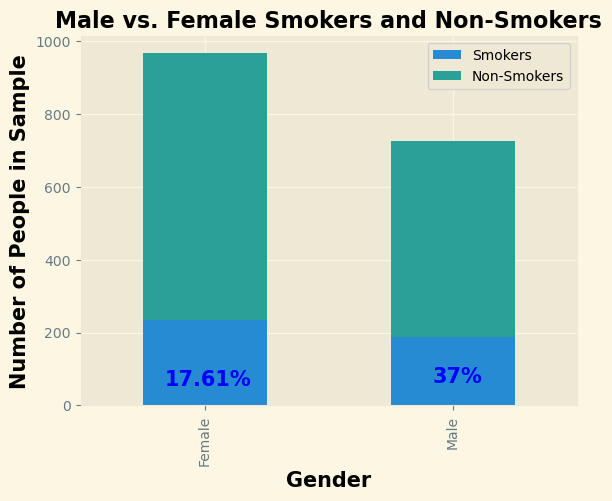

In [97]:
part_2_df = sqldf("select gender, sum(smoke) as total_smoke, count(*) as total from smoking_df group by gender ")
part_2_df["perc_smoke"] = part_2_df["total_smoke"] / part_2_df["total"]
part_2_df["non_smoke"] = part_2_df["total"] - part_2_df["total_smoke"]

part_2_df

part_2_df = part_2_df.set_index("gender")
plt.style.use("Solarize_Light2")

ax = part_2_df.plot.bar(y = ["total_smoke", "non_smoke"], stacked = True)
ax.text(s = "17.61%", y = 55, x = -0.16, color = "blue", size = 15, fontdict = {"fontweight" : "bold"})
ax.text(s = "37%", y = 63, x = 0.92, color = "blue", size = 15, fontdict = {"fontweight" : "bold"})
ax.set_title("Male vs. Female Smokers and Non-Smokers", color = "black", fontdict = {"fontweight" : "bold"})
ax.set_xlabel("Gender", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.set_ylabel("Number of People in Sample", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.legend(["Smokers", "Non-Smokers"], loc="upper right", labelcolor = "black")

part_2_df

<div style="max-width: 800px; margin: 0 auto; font-family: Arial, sans-serif; line-height: 1.6;">

  <h2 style="color: #4CAF50; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">Hypothesis Testing</h2>
  
  <p style="font-size: 18px; font-weight: bold; margin-top: 10px;">
    Using a significance level of \( \alpha = 0.05 \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 1: Model Statement</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{Male} \sim \text{Binomial}(158, p_\text{Female}) \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{Male} \sim \text{Binomial}(143, p_\text{Female}) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 2: State Hypotheses</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_0: p_\text{Male} = p_\text{Female} \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_\alpha: p_\text{Male} \neq p_\text{Female} \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 3: Test Statistic and Null Distribution</h3>
  <p style="text-align: center; font-size: 18px;">
    <b>Test Statistic and Null Distribution for Difference of Proportions:</b>
  </p>
  <p style="text-align: center; font-size: 22px; color: #555;">
    \( Z = \frac{(\hat{p_1} - \hat{p_2}) - (0)}{\sqrt{\frac{\bar{p}(1-\bar{p})}{n_1} + \frac{\bar{p}(1-\bar{p})}{n_2}}} \sim N(0, 1) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 4: Identify Relevant Outcomes</h3>
  <p style="text-align: center; font-size: 20px;">
    \(\text{Male vs. Female Test Statistic} = 0.710\)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 5: Calculate a P-Value</h3>
  <p style="text-align: center; font-size: 18px; color: #555;">
    \( \text{P-Value} = 2 \cdot P(Z > |z|) \)
  </p>
  <p style="text-align: center; font-size: 20px; font-weight: bold;">
    \( \text{Male vs. Female P-Value} = 0.478 \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 6: Interpret in Context</h3>
  <p style="font-size: 18px;">
    Our calculated P-Value is much larger than our significance level. This means that there is strong evidence for the null hypothesis that gender has no impact on the proportion of smokers in the UK. A confidence is not necessary and we can safely disregard the idea of a difference in population proportion based on gender.
  </p>

In [100]:
from math import sqrt
x1 = 187
n1 = 726
x2 = 234
n2 = 965

pbar = (x1 + x2)/(n1+n2)

numerator = (x1/n1) - (x2/n2)
denominator = sqrt((pbar*(1-pbar)/n1) + (pbar*(1-pbar)/n2))

test_stat = numerator/denominator
test_stat

0.7102528763879165

In [42]:
smoking_df

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,0
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,1
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,0
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,0
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,0
...,...,...,...,...,...,...,...,...,...
1686,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,0
1687,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,1
1688,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,0
1689,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,1


## **Part 3:** Education Levels

Conventional wisdom may tell you that the higher education level someone has attained, the more likley they would be to maintain good health, whether that be because they know more about healthy habits or they simply have more money and time to invest into getting rid of habits such as smoking. In order to make a conclusion about how exactly education may impact the probaility of someone smoking in the UK, I have mutated the data to help find more of a concrete conclusion about this question.

`No Formal Education`:
<ul>
    <li>No Qualification</li>
</ul>

`Basic Education`:
<ul>
    <li>GCSE/O Level</li>
    <li>GCSE/CSE</li>
</ul>

`Intermediate Education`:
<ul>
    <li>A Levels</li>
    <li>ONC/BTEC</li>
    <li>Higher/Sub Degree</li>
</ul>

`Higher Education`:
<ul>
    <li>Degree</li>
</ul>

,total_smoke,total,perc_smoke,non_smoke
highest_qualification,,,,
No Formal Education,137,586,0.233788,449
Basic Education,143,410,0.348780,267
Intermediate Education,71,306,0.232026,235
Higher Education,39,262,0.148855,223


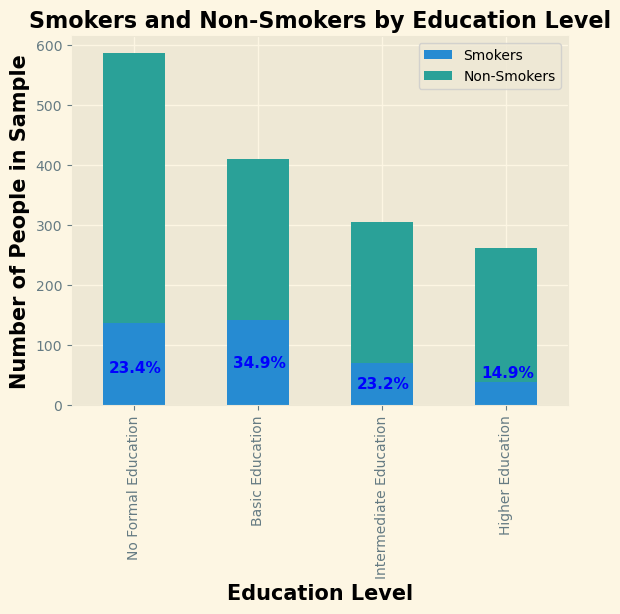

In [88]:
part_3_df = new_df
part_3_df["perc_smoke"] = part_3_df["total_smoke"] / part_3_df["total"]
part_3_df["non_smoke"] = part_3_df["total"] - part_3_df["total_smoke"]

part_3_df

part_3_df = part_3_df.set_index("highest_qualification")
plt.style.use("Solarize_Light2")

ax = part_3_df.plot.bar(y = ["total_smoke", "non_smoke"], stacked = True)
ax.text(s = "23.4%", y = 55, x = -0.2, color = "blue", size = 11, fontdict = {"fontweight" : "bold"})
ax.text(s = "34.9%", y = 63, x = 0.8, color = "blue", size = 11, fontdict = {"fontweight" : "bold"})
ax.text(s = "23.2%", y = 29, x = 1.8, color = "blue", size = 11, fontdict = {"fontweight" : "bold"})
ax.text(s = "14.9%", y = 46, x = 2.8, color = "blue", size = 11, fontdict = {"fontweight" : "bold"})
ax.set_title("Smokers and Non-Smokers by Education Level", color = "black", fontdict = {"fontweight" : "bold"})
ax.set_xlabel("Education Level", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.set_ylabel("Number of People in Sample", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.legend(["Smokers", "Non-Smokers"], loc="upper right", labelcolor = "black")

part_3_df

This graph shows something I would not have expected. Basic education, atleast according to our sample percentages has far and away the greatest fraction of smokers. `Higher Education` people, as I would expect has the lowest percentage of smokers, but `No Formal Education` people do not have the highest as I would have predicted. 

In [46]:
sqldf("select highest_qualification, sum(smoke) as total_smoke, count(*) as total from smoking_df group by highest_qualification")

,highest_qualification,total_smoke,total
0,A Levels,21,105
1,Degree,39,262
2,GCSE/CSE,38,102
3,GCSE/O Level,105,308
4,Higher/Sub Degree,27,125
5,No Qualification,137,586
6,ONC/BTEC,23,76
7,Other/Sub Degree,31,127


In [48]:
new_df = smoking_df[["highest_qualification", "smoke"]]

new_df = sqldf("select highest_qualification, sum(smoke) as total_smoke, count(*) as total from new_df group by highest_qualification")
sqldf("select * from new_df where highest_qualification = 'A Levels' or highest_qualification = 'Degree'")

new_df.loc[0] = (pd.Series({"highest_qualification": "No Formal Education", "total_smoke": 137, "total":586}))
new_df.loc[1] = pd.Series({"highest_qualification": "Basic Education", "total_smoke": 143, "total": 410})
new_df.loc[2] = pd.Series({"highest_qualification": "Intermediate Education", "total_smoke": 71, "total": 306})
new_df.loc[3] = pd.Series({"highest_qualification": "Higher Education", "total_smoke": 39, "total": 262})
new_df = new_df[(new_df["highest_qualification"] == "No Formal Education") | (new_df["highest_qualification"] == "Basic Education") | (new_df["highest_qualification"] == "Intermediate Education") | (new_df["highest_qualification"] == "Higher Education")]
new_df

,highest_qualification,total_smoke,total
0,No Formal Education,137,586
1,Basic Education,143,410
2,Intermediate Education,71,306
3,Higher Education,39,262
